# <font color='blue'>Implementing SGD Classifier with Logloss and L2 regularization Using SGD without using sklearn</font>

**Every Grader function has to return True.**

<font color='red'> Importing packages</font>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

<font color='red'>Creating custom dataset</font>

In [ ]:
X, y = make_classification(n_samples=50000, n_features=15, n_informative=10, n_redundant=5,
                           n_classes=2, weights=[0.7], class_sep=0.7, random_state=15)
# make_classification is used to create custom dataset 
# link:(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html) for more details

In [ ]:
X.shape, y.shape

((50000, 15), (50000,))

<font color='red'>Splitting data into train and test </font>

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=15)

In [ ]:
# Standardizing the data.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((37500, 15), (37500,), (12500, 15), (12500,))

In [ ]:
X_train[0]

array([-0.39348337, -0.19771903, -0.15037836, -0.21528098, -1.28594363,
       -0.66049132,  0.04140556, -0.22680269, -0.511055  , -0.42871073,
        0.4210912 ,  0.22560347, -0.6624427 , -0.68888516,  0.56015427])

# <font color='red' size=5>SGD classifier</font>

In [ ]:
# alpha : float
# Constant that multiplies the regularization term. 

# eta0 : double
# The initial learning rate for the ‘constant’, ‘invscaling’ or ‘adaptive’ schedules.

clf = linear_model.SGDClassifier(eta0=0.0001, alpha=0.0001, loss='log', random_state=15, penalty='l2', tol=1e-3, verbose=2, learning_rate='constant')

# documentation (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html) 

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.fit(X=X_train, y=y_train) # fitting our model

-- Epoch 1
Norm: 0.70, NNZs: 15, Bias: -0.501317, T: 37500, Avg. loss: 0.552526
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.04, NNZs: 15, Bias: -0.752393, T: 75000, Avg. loss: 0.448021
Total training time: 0.02 seconds.
-- Epoch 3
Norm: 1.26, NNZs: 15, Bias: -0.902742, T: 112500, Avg. loss: 0.415724
Total training time: 0.03 seconds.
-- Epoch 4
Norm: 1.43, NNZs: 15, Bias: -1.003816, T: 150000, Avg. loss: 0.400895
Total training time: 0.04 seconds.
-- Epoch 5
Norm: 1.55, NNZs: 15, Bias: -1.076296, T: 187500, Avg. loss: 0.392879
Total training time: 0.04 seconds.
-- Epoch 6
Norm: 1.65, NNZs: 15, Bias: -1.131077, T: 225000, Avg. loss: 0.388094
Total training time: 0.05 seconds.
-- Epoch 7
Norm: 1.73, NNZs: 15, Bias: -1.171791, T: 262500, Avg. loss: 0.385077
Total training time: 0.06 seconds.
-- Epoch 8
Norm: 1.80, NNZs: 15, Bias: -1.203840, T: 300000, Avg. loss: 0.383074
Total training time: 0.07 seconds.
-- Epoch 9
Norm: 1.86, NNZs: 15, Bias: -1.229563, T: 337500, Avg. loss: 0.

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=15, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [ ]:
clf.coef_, clf.coef_.shape, clf.intercept_
#clf.coef_ will return the weights
#clf.coef_.shape will return the shape of weights
#clf.intercept_ will return the intercept term

(array([[-0.89007184,  0.63162363, -0.07594145,  0.63107107, -0.38434375,
          0.93235243, -0.89573521, -0.07340522,  0.40591417,  0.4199991 ,
          0.24722143,  0.05046199, -0.08877987,  0.54081652,  0.06643888]]),
 (1, 15),
 array([-1.30580538]))



```
# This is formatted as code
```

## <font color='red' size=5> Implementing Logistic Regression with L2 regularization Using SGD: without using sklearn </font>




<br>

* Initialize the weight_vector and intercept term to zeros (code in <font color='blue'>def initialize_weights()</font>)

* Create a loss function (code in <font color='blue'>def logloss()</font>) 

 $log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$
- for each epoch:

    - for each batch of data points in train: (keep batch size=1)

        - calculate the gradient of loss function w.r.t each weight in weight vector (code in <font color='blue'>def gradient_dw()</font>)

        $dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)})$ <br>

        - Calculate the gradient of the intercept (code in <font color='blue'> def gradient_db()</font>) <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>check this</a>(Reference)

           $ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t}))$

        - Update weights and intercept (check the equation number 32 in the above mentioned <a href='https://drive.google.com/file/d/1nQ08-XY4zvOLzRX-lGf8EYB5arb7-m1H/view?usp=sharing'>pdf</a>(reference): <br>
        $w^{(t+1)}← w^{(t)}+α(dw^{(t)}) $<br>

        $b^{(t+1)}←b^{(t)}+α(db^{(t)}) $
    - calculate the log loss for train and test with the updated weights
    - And if you wish, you can compare the previous loss and the current loss, if it is not updating, then
        you can stop the training
    - append this loss in the list ( this will be used to see how loss is changing for each epoch after the training is over )


<font color='blue'>Initialize weights </font>

In [ ]:
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    #initialize the weights to zeros array of (1,dim) dimensions
    weight=[]
    b=0
    for i in range(0,dim):
      weight.append(0)
    #w=np.array(weight)
    return weight,b

In [ ]:
dim=X_train[0]
w,b = initialize_weights(len(dim)) #initializing weights to 0 which is of dimension (1,15) same as our number of features and bias(intercept)=0
print('w =',(w))
print('b =',str(b))

w = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
b = 0


<font color='cyan'>Grader function - 1 </font>

In [ ]:
dim=X_train[0] 
w,b = initialize_weights(len(dim))
def grader_weights(w,b):
  assert((len(w)==len(dim)) and b==0 and np.sum(w)==0.0)
  return True
grader_weights(w,b)

True

<font color='blue'>Compute sigmoid </font>

$sigmoid(z)= 1/(1+exp(-z))$

In [ ]:
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    sig=1/(1+math.exp(-z))
    return sig

<font color='cyan'>Grader function - 2</font>

In [ ]:
def grader_sigmoid(z):
  val=sigmoid(z)
  assert(val==0.8807970779778823)
  return True
grader_sigmoid(2)

True

<font color='blue'> Compute loss </font>

$log loss = -1*\frac{1}{n}\Sigma_{for each Yt,Y_{pred}}(Ytlog10(Y_{pred})+(1-Yt)log10(1-Y_{pred}))$

In [ ]:
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    sum=0
    for i in range(0,len(y_true)):
      a=math.log10(y_pred[i])
      b=float(y_true[i])*a
      c=math.log10(1-y_pred[i])
      d=float((1-y_true[i]))*c
      e=b+d
      sum=sum+e
    loss=(-1)*(1/len(y_true))*sum
    return loss

<font color='cyan'>Grader function - 3 </font>

In [ ]:
def grader_logloss(true,pred):
  loss=logloss(true,pred)
  assert(loss==0.07644900402910389)
  return True
true=[1,1,0,1,0]
pred=[0.9,0.8,0.1,0.8,0.2]
grader_logloss(true,pred)

True

<font color='blue'>Compute gradient w.r.to  'w' </font>

$dw^{(t)} = x_n(y_n − σ((w^{(t)})^{T} x_n+b^{t}))- \frac{λ}{N}w^{(t)}$ <br>

In [ ]:
def gradient_dw(x,y,w,b,alpha,N):
    '''In this function, we will compute the gardient w.r.to w '''
    summ=0
    z=0
    for i in range(0,len(w)):
        summ=summ+(w[i]*x[i])
    z=summ+b
    sig=sigmoid(z)
    f=y-sig
    arr=x*f
      #print(arr_previous)  #till here its calculation of first term xn(yn−σ((w(t))Txn+bt))
    m=alpha/N  # alpha is 0.0001
    n=np.array(w)
    mul=(n*m) #till here its calculation of second term −λNw(t)
    dw=arr-mul #Adding first and second term
    return dw

<font color='cyan'>Grader function - 4 </font>

In [ ]:
def grader_dw(x,y,w,b,alpha,N):
  grad_dw=gradient_dw(x,y,w,b,alpha,N)
  assert(np.sum(grad_dw)==2.613689585)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(len(grad_x)) #my initialize weights returns 0 and 0 for both w and b
alpha=0.0001
N=len(X_train)
grader_dw(grad_x,grad_y,w,b,alpha,N)

True

<font color='blue'>Compute gradient w.r.to 'b' </font>

$ db^{(t)} = y_n- σ((w^{(t)})^{T} x_n+b^{t})$

In [ ]:
 def gradient_db(x,y,w,b):
     #'''In this function, we will compute gradient w.r.to b '''
   db=0
   sumb=0 
   for i in range(0,len(w)):
        sumb=sumb+(w[i]*x[i])
   z1=sumb+b
   sig=sigmoid(z1)
   db=y-sig
   return db

<font color='cyan'>Grader function - 5 </font>

In [ ]:
def grader_db(x,y,w,b):
  grad_db=gradient_db(x,y,w,b)
  assert(grad_db==-0.5)
  return True
grad_x=np.array([-2.07864835,  3.31604252, -0.79104357, -3.87045546, -1.14783286,
       -2.81434437, -0.86771071, -0.04073287,  0.84827878,  1.99451725,
        3.67152472,  0.01451875,  2.01062888,  0.07373904, -5.54586092])
grad_y=0
grad_w,grad_b=initialize_weights(len(grad_x))
alpha=0.0001
N=len(X_train)
grader_db(grad_x,grad_y,grad_w,grad_b)

True

<font color='blue'> Implementing logistic regression</font>

In [ ]:
import matplotlib.pyplot as plt
def train(X_train,y_train,X_test,y_test,epochs,alpha,eta0):
    ''' In this function, we will implement logistic regression'''
    #Here eta0 is learning rate
    #implement the code as follows
    # initalize the weights (call the initialize_weights(X_train[0]) function)
    w,b=initialize_weights(len(X_train[0]))
    train_loss=[]
    test_loss=[]
    epoch=[]
    loss_train_prev=0
    # for every epoch
    for i in range(0,epochs):
      for j in range(0,len(X_train)):
        dw=gradient_dw(X_train[j],y_train[j],w,b,alpha,N)
        db=gradient_db(X_train[j],y_train[j],w,b)                       
        w=w+(eta0*dw)           #update w, b                      
        b=b+(eta0*db)                                        
      train_pred_op=pred(w,b,X_train)
      train_loss.append(logloss(y_train,train_pred_op))
      loss_train=logloss(y_train,train_pred_op)
      epoch.append(i)
      test_pred_op=pred(w,b,X_test)
      test_loss.append(logloss(y_test,test_pred_op))
      if abs(loss_train-loss_train_prev)<1e-4:
        break
      loss_train_prev=loss_train
    plt.xlabel("epoch number")
    plt.ylabel("Loss(log loss)")
    plt.title('epoch number vs train , test loss')
    plt.plot(epoch, train_loss,label = "Train loss")
    plt.plot(epoch, test_loss,label = "Test loss")
    plt.legend()
    plt.show()
        # predict the output of x_train[for all data points in X_train] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the train loss values in a list
        # predict the output of x_test[for all data points in X_test] using w,b
        #compute the loss between predicted and actual values (call the loss function)
        # store all the test loss values in a list
        # you can also compare previous loss and current loss, if loss is not updating then stop the process and return w,b

    return w,b

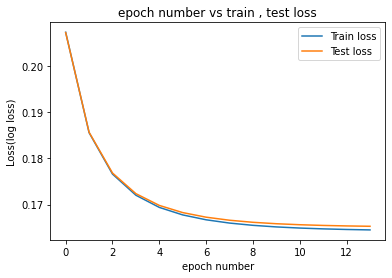

w:  [-0.89482323  0.63922609 -0.07409042  0.63113611 -0.38279876  0.9346933
 -0.89664514 -0.07124397  0.41113377  0.41550075  0.24845771  0.05300616
 -0.08703024  0.53952896  0.06749254]
b:  -1.3030058566516547


In [ ]:
alpha=0.0001
eta0=0.0001
N=len(X_train)
epochs=50
w,b=train(X_train,y_train,X_test,y_test,epochs,alpha,eta0)
print("w: ",w)
print("b: ",b)

If we compare this result with below values of w and b which was implemented by scikit learn, they are very close. So we can conclude our implementation is correct.

In [ ]:
# these are the results we got after we implemented sgd and found the optimal weights and intercept
w-clf.coef_, b-clf.intercept_

(array([[-4.75139040e-03,  7.60245639e-03,  1.85102713e-03,
          6.50362355e-05,  1.54498740e-03,  2.34086809e-03,
         -9.09928936e-04,  2.16124544e-03,  5.21959720e-03,
         -4.49834999e-03,  1.23628554e-03,  2.54417563e-03,
          1.74962845e-03, -1.28756176e-03,  1.05365463e-03]]),
 (1, 15),
 array([0.00279952]))